In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving Zomato data .csv to Zomato data .csv


{'Zomato data .csv': b"name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)\nJalsa,Yes,Yes,4.1/5,775,800,Buffet\nSpice Elephant,Yes,No,4.1/5,787,800,Buffet\nSan Churro Cafe,Yes,No,3.8/5,918,800,Buffet\nAddhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet\nGrand Village,No,No,3.8/5,166,600,Buffet\nTimepass Dinner,Yes,No,3.8/5,286,600,Buffet\nRosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet\nOnesta,Yes,Yes,4.6/5,2556,600,Cafes\nPenthouse Cafe,Yes,No,4.0/5,324,700,other\nSmacznego,Yes,No,4.2/5,504,550,Cafes\nVillage Caf\xc3\xa9,Yes,No,4.1/5,402,500,Cafes\nCafe Shuffle,Yes,Yes,4.2/5,150,600,Cafes\nThe Coffee Shack,Yes,Yes,4.2/5,164,500,Cafes\nCaf-Eleven,No,No,4.0/5,424,450,Cafes\nSan Churro Cafe,Yes,No,3.8/5,918,800,Cafes\nCafe Vivacity,Yes,No,3.8/5,90,650,Cafes\nCatch-up-ino,Yes,No,3.9/5,133,800,Cafes\nKirthi's Biryani,Yes,No,3.8/5,144,700,Cafes\nT3H Cafe,No,No,3.9/5,93,300,Cafes\n360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,400,Cafes\nTh

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
# convert the data type of the “rate” column to float and remove the denominator

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
# summary of the data frame

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<ipython-input-9-1fc80a6cd610>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette=colors)


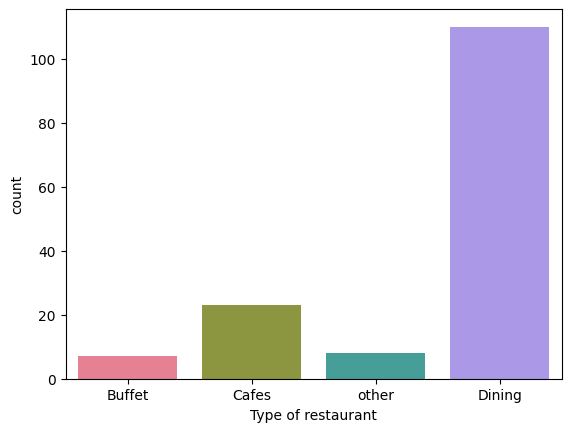

In [9]:
# Define a color palette
colors = sns.color_palette("husl", len(dataframe['listed_in(type)'].unique()))

# Plot
sns.countplot(x=dataframe['listed_in(type)'], palette=colors)
plt.xlabel("Type of restaurant")
plt.show()

**Conclusion:** The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

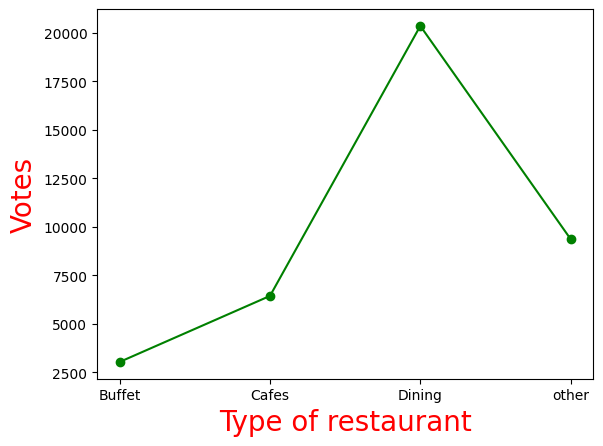

In [10]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

**Conclusion:** Dining restaurants are preferred by a larger number of individuals.

In [12]:
# Determine the restaurant’s name that received the maximum votes based on a given dataframe

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<ipython-input-16-fb326b10ba8e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'], palette=colors)


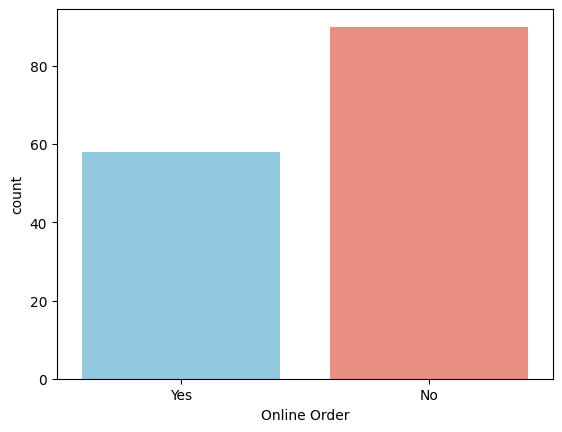

In [16]:
# Define custom colors for each bar
colors = ["skyblue", "salmon"]

# Plot
sns.countplot(x=dataframe['online_order'], palette=colors)
plt.xlabel("Online Order")
plt.show()

**Conclusion:** This suggests that a majority of the restaurants do not accept online orders.

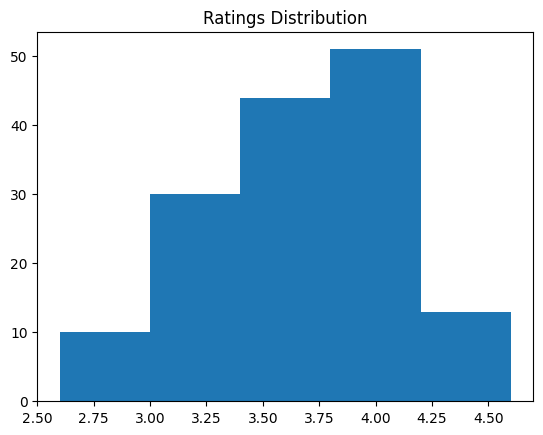

In [17]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

**Conclusion:** The majority of restaurants received ratings ranging from 3.5 to 4.

<ipython-input-19-e6dd185c5f7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(couple_data, bins=bins, labels=labels), palette=colors)


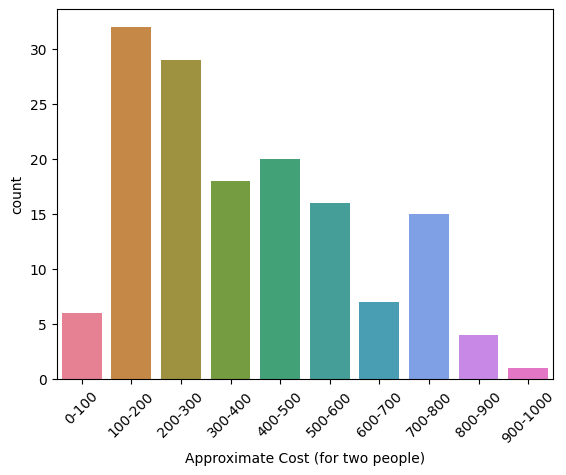

In [19]:
# Categorize the data into bins
bins = np.arange(0, couple_data.max() + 100, 100)  # Adjust bin width as needed
labels = [f"{i}-{i+100}" for i in bins[:-1]]  # Create labels for each bin

# Assign colors to each bin
colors = sns.color_palette("husl", len(bins)-1)  # Use a color palette, adjust as needed

# Plot
sns.countplot(x=pd.cut(couple_data, bins=bins, labels=labels), palette=colors)
plt.xlabel("Approximate Cost (for two people)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Conclusion:** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<ipython-input-20-ebdad5e215dc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette=colors)


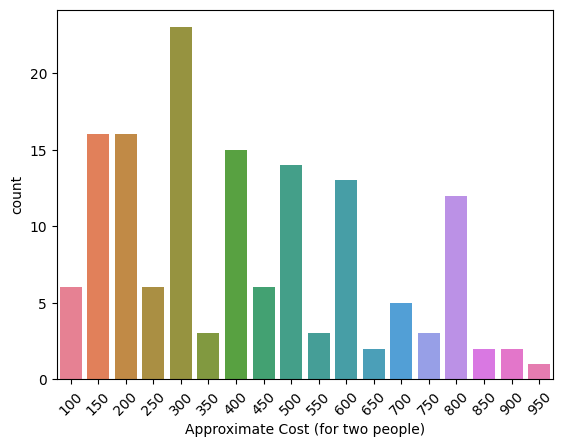

In [20]:
# Get unique values in the 'approx_cost(for two people)' column
unique_values = couple_data.unique()

# Define a custom color palette
colors = sns.color_palette("husl", len(unique_values))

# Plot
sns.countplot(x=couple_data, palette=colors)
plt.xlabel("Approximate Cost (for two people)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

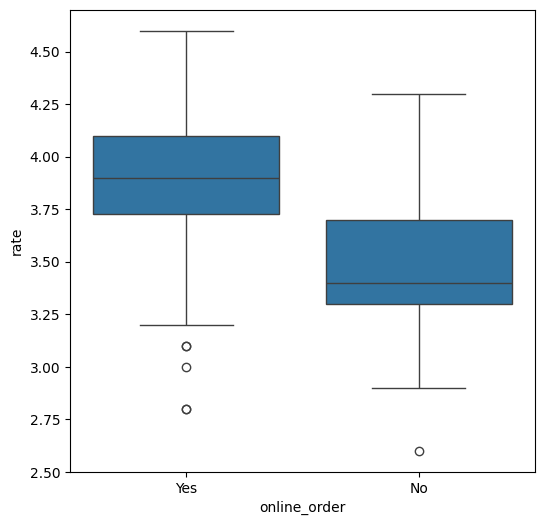

In [24]:
# Examine whether online orders receive higher ratings than offline orders.

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

**CONCLUSION:** Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

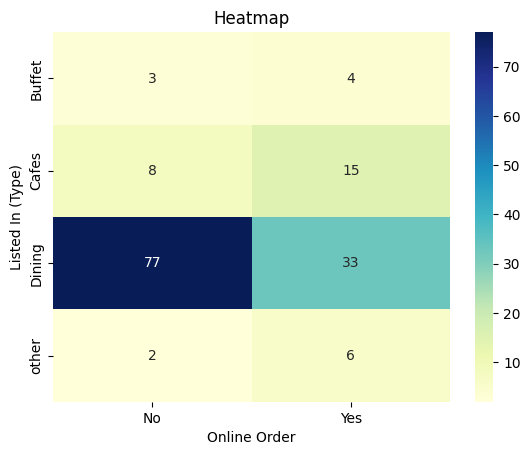

In [25]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

**CONCLUSION:** Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.